## Camera Calibration with OpenCV

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import PyQt5
%matplotlib inline

In [2]:
img_dir = 'output_images/'

### Distortion Correction

In [3]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('./camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)
    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
#         cv2.imshow('img',img)
#         cv2.waitKey(500)
# cv2.destroyAllWindows()

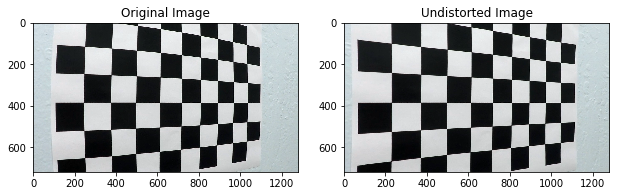

In [4]:
# Select an image
img = cv2.imread('./camera_cal/calibration5.jpg')

# Use cv2.calibrateCamera() and cv2.undistort()
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

undistorted = cv2.undistort(img, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=12)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=12)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.savefig(img_dir + "/undistorted.png", dpi=300, bbox_inches='tight')

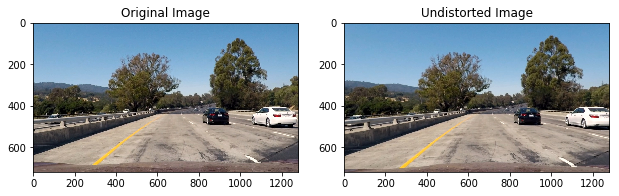

In [5]:
# Select a test image
img = cv2.imread('./test_images/test1.jpg')
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

undistorted = cv2.undistort(img_rgb, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6))
f.tight_layout()
ax1.imshow(img_rgb)
ax1.set_title('Original Image', fontsize=12)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=12)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.savefig(img_dir + "/undistorted_test1.png", dpi=300, bbox_inches='tight')

### Perspective transform

<IPython.core.display.Javascript object>


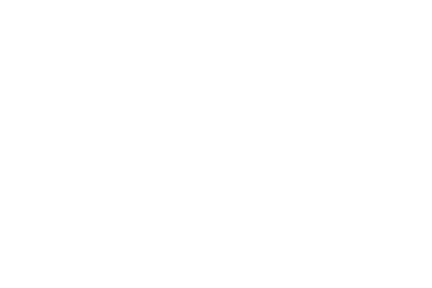

<IPython.core.display.Javascript object>


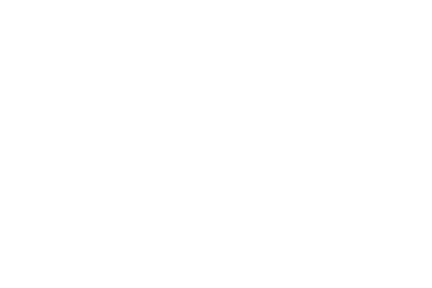

In [6]:
%matplotlib notebook
img = cv2.imread('./test_images/straight_lines2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Use cv2.calibrateCamera() and cv2.undistort()
undistorted = cv2.undistort(img, mtx, dist, None, mtx)
plt.imshow(undistorted)

In [7]:
%matplotlib inline

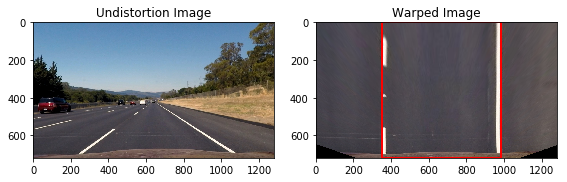

In [8]:
img = cv2.imread('./test_images/straight_lines2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Use cv2.calibrateCamera() and cv2.undistort()
undistorted = cv2.undistort(img, mtx, dist, None, mtx)

img_size = (undistorted.shape[1], undistorted.shape[0])
offset = 50
src = np.float32([[200,720], [563,470], [723,470], [1130,720]])
dst = np.float32([[350,720], [350,0], [980,0], [980,720]])
# The perspective transform M
M = cv2.getPerspectiveTransform(src, dst)
# The inverse perpective transform Minv
Minv = cv2.getPerspectiveTransform(dst, src)
# Warp the image using OpenCV warpPerspective()
warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
cv2.rectangle(warped,(350,720), (980,0),(255,0,0),10) 

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6))
f.tight_layout()
ax1.imshow(undistorted)
ax1.set_title('Undistortion Image', fontsize=12)
ax2.imshow(warped)
ax2.set_title('Warped Image', fontsize=12)
plt.savefig(img_dir + "/pespective.png", dpi=300, bbox_inches='tight')

### Save calibration data

In [9]:
import pickle
# Save the camera calibration result for later use
cali_pickle = {}
cali_pickle["mtx"] = mtx
cali_pickle["dist"] = dist
cali_pickle['M'] = M
cali_pickle['Minv'] = Minv
cali_pickle['src'] = src
cali_pickle['dst'] = dst

pickle.dump(cali_pickle, open( "./data/cali_pickle.p", "wb" ) )